# PhantomMail
This library is meant for generating fake emails for a specific topic. We will use the Python library faker to generate fake email addresses and company names and then we will use Ollama with Phi4 to generate the actual email contents.

Once the email is complete we will use Resend to send the email to a specific email address 

In this case, we will be generating fake order emails to request transports. 

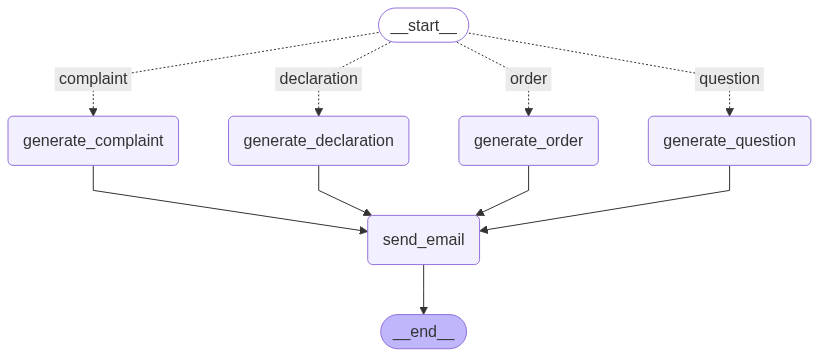

I0000 00:00:1753805992.306703 6720510 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


In [1]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Markdown, display, Image
from dotenv import load_dotenv
from phantommail.graphs import graph
import os



load_dotenv()


display(Image(graph.get_graph().draw_mermaid_png()))

config = {"configurable": {"sender": os.environ["SENDER_EMAIL"]}}
response = await graph.ainvoke({'recipients': ['ben@vectrix.ai'], 'email_type': 'order'}, config=config)

In [ ]:
import pandas as pd

customers = pd.read_csv('../src/phantommail/assets/customers.csv')
customers

In [ ]:
from langgraph_sdk import get_client

client = get_client(url=os.environ['LANGGRAPH_URL'])
# Using the graph deployed with the name "agent"
assistant_id = "graph"
# create thread
thread = await client.threads.create()
print(thread)

In [ ]:
config = {"configurable": {"sender": os.environ["SENDER_EMAIL"]}}

# This schedules a job to run at 15:27 (3:27PM) every day
cron_job_stateless = await client.crons.create(
    "graph",
    schedule="* * * * *",
    input={'recipients': ['vectrix-test@outlook.com']}, 
    config=config,
)

cron_job_stateless

In [ ]:
await client.crons.delete(cron_job_stateless["cron_id"])